In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing cost data sets

staff_d = pd.read_csv('staff_costs.csv')
sub_d=pd.read_csv('subcontractor_costs.csv')
consum_d=pd.read_csv('consumables_costs.csv')
soft_d=pd.read_csv('software_costs.csv')

In [3]:
#Creating sum of each cif and year per cost bracket, and adding them for the total costs.

staff_cost = staff_d.set_index(['Cif', 'ye'])['costs']
staff_app = staff_d.set_index(['Cif', 'ye'])['pct']
staff_rd_cost=staff_cost.mul(staff_app/100)
staff_cost_groupby=staff_rd_cost.groupby(['Cif', 'ye']).sum()
staff_cost_sum=pd.DataFrame(staff_cost_groupby)

sub_cost = sub_d.set_index(['Cif', 'ye'])['costs']
sub_app = sub_d.set_index(['Cif', 'ye'])['pct']
sub_rd_cost=sub_cost.mul(sub_app/100)
sub_cost_groupby=sub_rd_cost.groupby(['Cif', 'ye']).sum()
sub_cost_sum=pd.DataFrame(sub_cost_groupby)

consum_cost = consum_d.set_index(['Cif', 'ye'])['costs']
consum_app = consum_d.set_index(['Cif', 'ye'])['pct']
consum_rd_cost=consum_cost.mul(consum_app/100)
consum_cost_groupby=consum_rd_cost.groupby(['Cif', 'ye']).sum()
consum_cost_sum=pd.DataFrame(consum_cost_groupby)

    
soft_cost = soft_d.set_index(['Cif', 'ye'])['costs']
soft_app = soft_d.set_index(['Cif', 'ye'])['pct']
soft_rd_cost=soft_cost.mul(soft_app/100)
soft_cost_groupby=soft_rd_cost.groupby(['Cif', 'ye']).sum()
soft_cost_sum=pd.DataFrame(soft_cost_groupby)



all_costs=pd.concat([staff_cost_sum, sub_cost_sum, consum_cost_sum, soft_cost_sum]).sum(level=['Cif','ye'])
all_costs.reset_index(inplace=True)

In [4]:
#importing client data

import re
all_d_spread = pd.read_csv('RD All Data Sheet 2018xxx.csv')
all_d_spread[['CIFNo', 'Expr1', 'Claim Phase', 'DateReceived', 'PostCode', 'R&D Claim Name', 'Claim Status']]

yy_regex=re.compile(r'\d{2}$')

all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].str.strip()
all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].astype(str)
all_d_spread['yydd']=all_d_spread['R&D Claim Name'].str.findall(yy_regex)
all_d_spread['yydd']=all_d_spread['yydd'].astype(str).str.replace('\[|\]|\'', '')
clientdata=all_d_spread[all_d_spread.yydd != '']
clientdata=clientdata[clientdata['Claim Status'] == 'Paid']
clientdata['yydd']=clientdata['yydd'].astype(str)
clientdata['CIFNo']=clientdata['CIFNo'].astype(str)

all_costs['Cif']=all_costs['Cif'].astype(str)
all_costs['ye']=all_costs['ye'].astype(str)

staff_cost_mean=staff_rd_cost.groupby(['Cif', 'ye']).mean()
app_means=staff_d.groupby(['Cif', 'ye'])['pct'].mean()
app_counts=staff_rd_cost.groupby(['Cif', 'ye']).count()

merged_data=pd.merge(all_costs, clientdata, how='left', left_on=['Cif', 'ye'], right_on=['CIFNo', 'yydd'])


all_d=merged_data[['Cif', 'ye', 'Expr1', 'Claim Phase', 'DateReceived', 'ReportSubmitted', 'PostCode', 0, 'Industry','CIF_Employees', 'CIF_Turnover']]
all_d.dropna(how='any', axis=0, inplace=True)
all_d[all_d.columns]=all_d.applymap(lambda x: x.strip() if type(x) is str else x)
all_d['Cif']=all_d['Cif'].astype(np.int64)
all_d['ye']=all_d['ye'].astype(np.int64)

#Postcode preprocessing
postcode_regex=re.compile(r'^\D{1,}')
all_d.PostCode=all_d.PostCode.str.findall(postcode_regex)
all_d.PostCode=all_d.PostCode.astype(str).str.replace('\[|\]|\'', '')

C:\Users\Iwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,31,32,37,70,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 


In [5]:
#adding each cost bracket to the dataset

al_staff=pd.merge(all_d.reset_index(), staff_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_sub=pd.merge(al_staff.reset_index(), sub_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_consum=pd.merge(al_sub.reset_index(), consum_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_soft=pd.merge(al_consum.reset_index(), soft_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_soft


index      Expr1 Claim Phase      DateReceived   ReportSubmitted  \
Cif  ye                                                                     
277  13      0   December    Phase 02  21/11/2013 00:00  22/08/2014 00:00   
     14      1   December    Phase 03  21/11/2013 00:00  29/02/2016 00:00   
     15      2   December    Phase 04  21/11/2013 00:00  04/03/2016 00:00   
312  13      3    January    Phase 01  13/05/2014 00:00  12/09/2014 00:00   
361  16      6      March    Phase 03  25/04/2014 00:00  17/01/2017 00:00   
403  13      9      March    Phase 01  08/05/2014 00:00  30/06/2014 00:00   
     14     10      March    Phase 01  08/05/2014 00:00  18/11/2014 00:00   
     15     11      March    Phase 02  08/05/2014 00:00  18/02/2016 00:00   
     16     12      March    Phase 03  08/05/2014 00:00  11/11/2016 00:00   
415  15     14   December    Phase 03  12/05/2014 00:00  12/09/2016 00:00   
421  12     16       July    Phase 01  15/05/2014 00:00  31/07/2014 00:00   
     14     17       July    Phase 02  15/05/2014 00:00  21/08/2015 00:00   
     15     18       July    Phase 03  15/05/2014 00:00  27/08/2015 00:00   
427  13     19   December    Phase 01  22/05/2014 00:00  28/11/2014 00:00   
     14     20   December    Phase 02  22/05/2014 00:00  24/08/2015 00:00   
451  12     23       June    Phase 01  04/06/2014 00:00  30/06/2014 00:00   
     13     24       June    Phase 01  04/06/2014 00:00  23/10/2014 00:00   
     15     25       June    Phase 03  04/06/2014 00:00  10/06/2016 00:00   
463  12     26  September    Phase 01  05/06/2014 00:00  30/09/2014 00:00   
     14     27  September    Phase 02  05/06/2014 00:00  31/12/2014 00:00   
495  15     30      March    Phase 01  02/12/2014 00:00  21/03/2016 00:00   
496  13     31   February    Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     14     32   February    Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     15     33   February    Phase 02  25/06/2014 00:00  18/03/2016 00:00   
     16     34   February    Phase 03  25/06/2014 00:00  21/02/2017 00:00   
501  13     35      March    Phase 01  04/07/2014 00:00  26/11/2014 00:00   
     14     36      March    Phase 01  04/07/2014 00:00  25/11/2014 00:00   
502  12     37    January    Phase 01  08/07/2014 00:00  18/09/2014 00:00   
504  14     38  September    Phase 01  10/07/2014 00:00  05/08/2015 00:00   
505  13     39       June    Phase 02  11/07/2014 00:00  14/10/2014 00:00   
...        ...        ...         ...               ...               ...   
3850 15   1897     August    Phase 01  31/03/2017 00:00  31/08/2017 00:00   
     16   1898     August    Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3851 16   1899     August    Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3855 15   1900       July    Phase 01  03/04/2017 00:00  04/05/2017 00:00   
     16   1901       July    Phase 01  03/04/2017 00:00  04/05/2017 00:00   
3856 15   1902  September    Phase 01  03/04/2017 00:00  30/05/2017 00:00   
3863 15   1906     August    Phase 01  10/04/2017 00:00  31/08/2017 00:00   
     16   1907     August    Phase 01  10/04/2017 00:00  31/08/2017 00:00   
3866 15   1908      April    Phase 01  10/04/2017 00:00  30/04/2017 00:00   
     16   1909      April    Phase 01  10/04/2017 00:00  30/04/2017 00:00   
3883 15   1919     August    Phase 01  24/04/2017 00:00  31/05/2017 00:00   
     16   1920     August    Phase 01  24/04/2017 00:00  31/05/2017 00:00   
3907 15   1923       June    Phase 01  03/05/2017 00:00  30/06/2017 00:00   
     16   1924       June    Phase 01  03/05/2017 00:00  30/06/2017 00:00   
3929 17   1930      March    Phase 01  17/05/2017 00:00  14/11/2017 00:00   
3987 16   1946       July    Phase 01  01/06/2017 00:00  26/09/2017 00:00   
4032 17   1964      April    Phase 01  22/06/2017 00:00  31/08/2017 00:00   
4082 15   1982  September    Phase 01  07/07/2017 00:00  29/09/2017 00:00   
4098 16   1987      March    Phase 01  11/07/2017 00:00  29/09/2017 00:00   
     

In [6]:
#adding the number of each cost to the dataframe with all data columns. 
#Also adding the median of staff time spent on R&D, which we saw before to be the strongest 
# predictor of R&D appropriation.

staff_cost_count=staff_rd_cost.groupby(['Cif', 'ye']).count()
sub_cost_count=sub_rd_cost.groupby(['Cif', 'ye']).count()
consum_cost_count=consum_rd_cost.groupby(['Cif', 'ye']).count()
soft_cost_count=soft_rd_cost.groupby(['Cif', 'ye']).count()

al_soft.columns=['?', 'Month', 'Phase','Received', 'Completed', 'PostCode', 'Total_Costs', 'Industry','CIF_Employees', 'CIF_Turnover', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs']
count_al_staff=pd.merge(al_soft.reset_index(), staff_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
count_al_sub=pd.merge(count_al_staff.reset_index(), sub_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
count_al_consum=pd.merge(count_al_sub.reset_index(), consum_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
count_al_soft=pd.merge(count_al_consum.reset_index(), soft_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])

staff_app_median=staff_app.groupby(['Cif', 'ye']).median()
app_al_staff=pd.merge(count_al_soft.reset_index(), staff_app_median.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
app_al_staff.iloc[:,0:20]

?      Month     Phase          Received         Completed  \
Cif  ye                                                                  
277  13     0   December  Phase 02  21/11/2013 00:00  22/08/2014 00:00   
     14     1   December  Phase 03  21/11/2013 00:00  29/02/2016 00:00   
     15     2   December  Phase 04  21/11/2013 00:00  04/03/2016 00:00   
312  13     3    January  Phase 01  13/05/2014 00:00  12/09/2014 00:00   
361  16     6      March  Phase 03  25/04/2014 00:00  17/01/2017 00:00   
403  13     9      March  Phase 01  08/05/2014 00:00  30/06/2014 00:00   
     14    10      March  Phase 01  08/05/2014 00:00  18/11/2014 00:00   
     15    11      March  Phase 02  08/05/2014 00:00  18/02/2016 00:00   
     16    12      March  Phase 03  08/05/2014 00:00  11/11/2016 00:00   
415  15    14   December  Phase 03  12/05/2014 00:00  12/09/2016 00:00   
421  12    16       July  Phase 01  15/05/2014 00:00  31/07/2014 00:00   
     14    17       July  Phase 02  15/05/2014 00:00  21/08/2015 00:00   
     15    18       July  Phase 03  15/05/2014 00:00  27/08/2015 00:00   
427  13    19   December  Phase 01  22/05/2014 00:00  28/11/2014 00:00   
     14    20   December  Phase 02  22/05/2014 00:00  24/08/2015 00:00   
451  12    23       June  Phase 01  04/06/2014 00:00  30/06/2014 00:00   
     13    24       June  Phase 01  04/06/2014 00:00  23/10/2014 00:00   
     15    25       June  Phase 03  04/06/2014 00:00  10/06/2016 00:00   
463  12    26  September  Phase 01  05/06/2014 00:00  30/09/2014 00:00   
     14    27  September  Phase 02  05/06/2014 00:00  31/12/2014 00:00   
495  15    30      March  Phase 01  02/12/2014 00:00  21/03/2016 00:00   
496  13    31   February  Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     14    32   February  Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     15    33   February  Phase 02  25/06/2014 00:00  18/03/2016 00:00   
     16    34   February  Phase 03  25/06/2014 00:00  21/02/2017 00:00   
501  13    35      March  Phase 01  04/07/2014 00:00  26/11/2014 00:00   
     14    36      March  Phase 01  04/07/2014 00:00  25/11/2014 00:00   
502  12    37    January  Phase 01  08/07/2014 00:00  18/09/2014 00:00   
504  14    38  September  Phase 01  10/07/2014 00:00  05/08/2015 00:00   
505  13    39       June  Phase 02  11/07/2014 00:00  14/10/2014 00:00   
...       ...        ...       ...               ...               ...   
3850 15  1897     August  Phase 01  31/03/2017 00:00  31/08/2017 00:00   
     16  1898     August  Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3851 16  1899     August  Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3855 15  1900       July  Phase 01  03/04/2017 00:00  04/05/2017 00:00   
     16  1901       July  Phase 01  03/04/2017 00:00  04/05/2017 00:00   
3856 15  1902  September  Phase 01  03/04/2017 00:00  30/05/2017 00:00   
3863 15  1906     August  Phase 01  10/04/2017 00:00  31/08/2017 00:00   
     16  1907     August  Phase 01  10/04/2017 00:00  31/08/2017 00:00   
3866 15  1908      April  Phase 01  10/04/2017 00:00  30/04/2017 00:00   
     16  1909      April  Phase 01  10/04/2017 00:00  30/04/2017 00:00   
3883 15  1919     August  Phase 01  24/04/2017 00:00  31/05/2017 00:00   
     16  1920     August  Phase 01  24/04/2017 00:00  31/05/2017 00:00   
3907 15  1923       June  Phase 01  03/05/2017 00:00  30/06/2017 00:00   
     16  1924       June  Phase 01  03/05/2017 00:00  30/06/2017 00:00   
3929 17  1930      March  Phase 01  17/05/2017 00:00  14/11/2017 00:00   
3987 16  1946       July  Phase 01  01/06/2017 00:00  26/09/2017 00:00   
4032 17  1964      April  Phase 01  22/06/2017 00:00  31/08/2017 00:00   
4082 15  1982  September  Phase 01  07/07/2017 00:00  29/09/2017 00:00   
4098 16  1987      March  Phase 01  11/07/2017 00:00  29/09/2017 00:00   
     16  1988  September  Phase 01  11/07/2017 00:00  29/09/2017 00:00   
4132 16  2005   February  Phase 01  24/07/2017 00:00  21/11/2017 00:00   
     17  2006   

In [7]:
#Renaming the columns and visual check to ensure it is structured correctly.
app_al_staff.columns=['?', 'Month', 'Phase','Received', 'Completed', 'PostCode', 'Total_Costs', 'Industry','CIF_Employees', 'CIF_Turnover', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs', 'Num_Staff', 'Num_Subs', 'Num_Materials', 'Num_Software', 'Staff_pct']
all_data=app_al_staff[['Month', 'Phase','PostCode', 'Industry','Received', 'Completed', 'Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs', 'Num_Staff', 'Num_Subs', 'Num_Materials', 'Num_Software', 'Staff_pct','CIF_Employees', 'CIF_Turnover']]
all_data.iloc[:,0:15]

Month     Phase PostCode                                Industry  \
Cif  ye                                                                         
277  13   December  Phase 02        L                  Mechanical Engineering   
     14   December  Phase 03        L                  Mechanical Engineering   
     15   December  Phase 04        L                  Mechanical Engineering   
312  13    January  Phase 01       LL                            Food & Drink   
361  16      March  Phase 03       RM                            Horticulture   
403  13      March  Phase 01       EN                     Wholesalers/Imports   
     14      March  Phase 01       EN                     Wholesalers/Imports   
     15      March  Phase 02       EN                     Wholesalers/Imports   
     16      March  Phase 03       EN                     Wholesalers/Imports   
415  15   December  Phase 03        N                            Construction   
421  12       July  Phase 01       GU          Management/Consulting/Training   
     14       July  Phase 02       GU          Management/Consulting/Training   
     15       July  Phase 03       GU          Management/Consulting/Training   
427  13   December  Phase 01       ME          Management/Consulting/Training   
     14   December  Phase 02       ME          Management/Consulting/Training   
451  12       June  Phase 01       OL  Printing/Publishing/Literature Binding   
     13       June  Phase 01       OL  Printing/Publishing/Literature Binding   
     15       June  Phase 03       OL  Printing/Publishing/Literature Binding   
463  12  September  Phase 01       CM             Ventilation/Window Services   
     14  September  Phase 02       CM             Ventilation/Window Services   
495  15      March  Phase 01        M                  Plastic/Glass Moulding   
496  13   February  Phase 01       SA                  Mechanical Engineering   
     14   February  Phase 01       SA                  Mechanical Engineering   
     15   February  Phase 02       SA                  Mechanical Engineering   
     16   February  Phase 03       SA                  Mechanical Engineering   
501  13      March  Phase 01        L                     Wholesalers/Imports   
     14      March  Phase 01        L                            Food & Drink   
502  12    January  Phase 01       OL                  Mechanical Engineering   
504  14  September  Phase 01       WA                      Telecommunications   
505  13       June  Phase 02       BL                                  Dental   
...            ...       ...      ...                                     ...   
3850 15     August  Phase 01       SE          Management/Consulting/Training   
     16     August  Phase 01       SE          Management/Consulting/Training   
3851 16     August  Phase 01       SE          Management/Consulting/Training   
3855 15       July  Phase 01       NP          Management/Consulting/Training   
     16       July  Phase 01       NP          Management/Consulting/Training   
3856 15  September  Phase 01       SY                           Manufacturing   
3863 15     August  Phase 01       SO          Management/Consulting/Training   
     16     August  Phase 01       SO          Management/Consulting/Training   
3866 15      April  Phase 01       BD                           Manufacturing   
     16      April  Phase 01       BD                           Manufacturing   
3883 15     August  Phase 01       LN                          Motor Industry   
     16     August  Phase 01       LN                          Motor Industry   
3907 15       June  Phase 01       PR                           Manufacturing   
     16       June  Phase 01       PR                           Manufacturing   
3929 17      March  Phase 01        Y                                  Retail   
3987 16       July  Phase 01       SW                           Manufacturing   
4032 17      April  Phase 01        M       

In [8]:
# adding total cost data of each cost bracket.
all_costs['Cif']=all_costs['Cif'].astype(np.int64)
all_costs['ye']=all_costs['ye'].astype(np.int64)

def cost_append(cost, df):
    cost_total=cost.groupby(['Cif', 'ye']).sum()
    payroll=pd.merge(df.reset_index(), cost_total.reset_index(), on=['Cif', 'ye'], how='left')
    return payroll


reset_costs=all_data
staff=cost_append(staff_cost, reset_costs)
subs=cost_append(sub_cost, staff)
consum=cost_append(consum_cost, subs)
consum.drop(['level_0', 'index'],axis=1, inplace=True)
soft=cost_append(soft_cost, consum)

soft.drop(['index'],axis=1, inplace=True)

In [9]:
#Resetting the index after merging dataframes in the previous cell.
soft.set_index(['Cif', 'ye'], inplace=True)

In [10]:
# Renaming columns after adding more features
soft.columns=['Month', 'Phase','PostCode', 'Industry','Received', 'Completed', 'Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs', 'Num_Staff', 'Num_Subs', 'Num_Materials', 'Num_Software', 'Staff_pct','CIF_Employees', 'CIF_Turnover', 'Staff_Payroll', 'Sub_Payroll', 'Material_Payroll', 'Software_Payroll']
all_data=soft

In [11]:
# Converting date columns to a continuous day feature.
all_data['Received'] = pd.to_datetime(all_data['Received'])    
all_data['Received'] = (all_data['Received'] - all_data['Received'].min())  / np.timedelta64(1,'D')
all_data['Completed'] = pd.to_datetime(all_data['Completed'])    
all_data['Completed'] = (all_data['Completed'] - all_data['Completed'].min())  / np.timedelta64(1,'D')

In [12]:
#Converting categorial features to a sparse dataframe.
all_data=pd.get_dummies(all_data, drop_first=True)
all_data.fillna(value=0, inplace=True)
all_data

Received  Completed    Total_Costs    Staff_Costs  \
Cif  ye                                                      
277  13       0.0       53.0  519297.676200  444597.411500   
     14       0.0      609.0  770372.973000  484438.682500   
     15       0.0      643.0   63046.854000       0.000000   
312  13     173.0      162.0   21292.546058   21292.546058   
361  16     155.0      932.0   39805.490000   35333.400000   
403  13     257.0        0.0   42309.500000   42309.500000   
     14     257.0      141.0   42309.500000   42309.500000   
     15     257.0      598.0   90340.543000   47163.157000   
     16     257.0      865.0   90279.302249   32105.359396   
415  15     379.0      893.0   53406.449503   41819.334670   
421  12     175.0       31.0   35119.132000   33013.232000   
     14     175.0      417.0  113258.000000   53569.280000   
     15     175.0      423.0   78315.243000   59749.280000   
427  13     182.0      151.0   11638.529400   10955.394400   
     14     182.0      420.0   32561.967000   16819.652000   
451  12     136.0        0.0   22666.236500   22666.236500   
     13     136.0      115.0   33055.162800   28855.162800   
     15     136.0      829.0   36179.997500   35635.717500   
463  12     166.0       92.0    2183.359200    2183.359200   
     14     166.0      184.0  177389.642900  104003.959400   
495  15      83.0      630.0   13879.229737   12629.229737   
496  13     216.0      232.0   85327.981500   54000.751500   
     14     216.0      232.0  100082.073000   57289.813000   
     15     216.0      627.0  118281.971000   68386.621000   
     16     216.0      967.0  141204.507542   99141.381500   
501  13     137.0      149.0   11221.104000    9988.304000   
     14     137.0      148.0   21320.449000   20364.829000   
502  12     259.0       80.0   78628.240000   52651.240000   
504  14     320.0      312.0  146819.352600  146269.352600   
505  13     351.0      106.0   85842.900000   65690.400000   
...           ...        ...            ...            ...   
3850 15    1226.0     1158.0    4375.067191    4355.147687   
     16    1226.0     1158.0    6914.012359    6888.075769   
3851 16    1226.0     1158.0    6069.433482    5941.429482   
3855 15    1199.0     1010.0   74817.929998   74817.929998   
     16    1199.0     1010.0   69546.888611   69546.888611   
3856 15    1199.0     1065.0   51491.504244   48654.714000   
3863 15    1413.0     1158.0   37068.733624   37068.733624   
     16    1413.0     1158.0   82899.798085   72411.805978   
3866 15    1413.0     1035.0   18739.233500   18739.233500   
     16    1413.0     1035.0   23831.434000   23831.434000   
3883 15    1250.0     1066.0   47666.360500   47638.760500   
     16    1250.0     1066.0   65668.459500   65512.399500   
3907 15    1200.0     1096.0    2368.899000       0.000000   
     16    1200.0     1096.0    1828.242000       0.000000   
3929 17    1273.0     1233.0   16966.970588   16848.250000   
3987 16    1142.0     1184.0   18303.701520       0.000000   
4032 17    1309.0     1158.0   23434.798500    2569.792000   
4082 15    1324.0     1187.0   36338.476000   27534.816000   
4098 16    1447.0     1187.0  274640.971600  274069.894000   
     16    1447.0     1187.0  274640.971600  274069.894000   
4132 16    1341.0     1240.0   11440.644000   11322.774000   
     17    1341.0     1240.0   13300.577999   13165.427999   
4225 15    1369.0     1246.0   14482.860250    5872.164000   
     16    1369.0     1246.0   19396.966500    8504.119000   
4267 15    1379.0     1136.0   10699.054400   10699.054400   
4305 15    1400.0     1187.0   22849.112000   15344.000000   
     16    1400.0     1187.0   31644.607500   22494.000000   
4392 15    1425.0     1268.0   67962.798000   45545.058000   
4409 15    1429.0     1247.0   28051.830694   27511.806500   
     16    1429.0     1247.0   27488.078323   26924.163000   

         Subcontractor_Costs  Material_Costs  Software_Costs  Num_Staff  \
Cif  ye                    

In [13]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

#initial view of regression information of the staff costs and total costs, 
# staff costs having the highest correlation coefficient as seen from the inferential statistic module.
m = ols('Total_Costs ~ Staff_Costs',all_data).fit()
print(m.summary())

C:\Users\Iwan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:            Total_Costs   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     4098.
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:29:41   Log-Likelihood:                -20726.
No. Observations:                1678   AIC:                         4.146e+04
Df Residuals:                    1676   BIC:                         4.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.472e+04   1632.734      9.016      

In [14]:
# initializing data, dropping the columns which sum to total the raw costs.
# Having all costs in the model would make it very obvious what the total R&D costs would be.
# I will first complete the model without this data, and see how well the model performs.
#It might also be unrealistic to have this data for my client when they use the model.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
y = all_data.Total_Costs
# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, y)
cv_scores = cross_val_score(lm, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[  2.93350768e-01   7.89207324e-01   7.13173879e-01   5.28790354e-01
  -1.64766020e+06]
Average 5-Fold CV Score: -329531.57511462347


Running a linear model on the data yielded very poor results. Next I will try the random forest regressor.

In [15]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
y = all_data.Total_Costs
# This creates a LinearRegression object
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [16]:
# fitting data to the regression model
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [17]:
# Cross validation scoring of the linear regression model, 5-fold CV.
cv_scores = cross_val_score(rf, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.59667163  0.70578499  0.53593282  0.71997343  0.78343993]
Average 5-Fold CV Score: 0.6683605605085882


In [18]:
# Performing 3-fold CV.
cv_scores3 = cross_val_score(rf, X, y, cv=3)

print(np.mean(cv_scores3))

# Performing 10-fold CV.
cv_scores10 = cross_val_score(rf, X, y, cv=10)
print(np.mean(cv_scores10))

0.63019534758
0.667707329688


coeffs=pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(coeffs)

In [19]:
#predicting first 5 values of X
rf.predict(X)[0:5]

array([ 469452.80123167,  647108.57872804,   53067.545575  ,
         22736.85230255,   35831.52821444])

In [20]:
#What the first 5 values actually are.
all_data.Total_Costs.head(5)

Cif  ye
277  13    519297.676200
     14    770372.973000
     15     63046.854000
312  13     21292.546058
361  16     39805.490000
Name: Total_Costs, dtype: float64

In [21]:
#Testing the P values of the model and checking what the highest P value is - 
#that which we need to remove from the model.
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar

0.96573007788173648

In [22]:
#View of the result using all the features.
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     40.26
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:29:49   Log-Likelihood:                -20561.
No. Observations:                1678   AIC:                         4.151e+04
Df Residuals:                    1486   BIC:                         4.255e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Received                                           -3.2339      9.591     -0.337      0.736     -22.046      15.579
Completed                                           1.0386      9.684      0.107      0.915     -17.958      20.035
Num_Staff                                        1353.8335    438.590      3.087      0.002     493.513    2214.154
Num_Subs                                         5760.8365    619.342      9.302      0.000    4545.958    6975.715
Num_Materials                                    8294.7862   1112.205      7.458      0.000    6113.127    1.05e+04
Num_Software                                    -1293.0112   2297.326     -0.563      0.574   -5799.357    3213.335
Staff_pct                                         994.1408     63.940     15.548      0.000     868.718    1119.564
CIF_Employees                                      -0.0037      0.006     -0.598      0.550      -0.016       0.009
CIF_Turnover                                        0.0007   8.26e-05      8.206      0.000       0.001       0.001
Staff_Payroll                                       0.1924      0.013     14.694      0.000       0.167       0.218
Sub_Payroll                                         0.2608      0.022     11.797      0.000       0.217       0.304
Material_Payroll                                    0.0215      0.002      8.843      0.000       0.017       0.026
Software_Payroll                                    1.1681      0.084     13.828      0.000       1.002       1.334
Month_August                                     1.035e+04   7852.246      1.318      0.188   -5055.827    2.57e+04
Month_December                                   1.138e+04   6255.680      1.819      0.069    -890.123    2.37e+04
Month_February                                   6213.4986   8980.520      0.692      0.489   -1.14e+04    2.38e+04
Month_January                                   -3692.0249   8857.123     -0.417      0.677   -2.11e+04    1.37e+04
Month_July                                      -5456.4898   9486.289     -0.575      0.565   -2.41e+04    1.32e+04
Month_June                                        660.6515   7248.367      0.091      0.927   -1.36e+04    1.49e+04
Month_March                                      1547.8554   5970.097      0.259      0.795   -1.02e+04    1.33e+04
Month_May                                        1.271e+04   8415.051      1.510      0.131   -3800.576    2.92e+04
Month_November                                   6150.2071   9331.824      0.659      0.510   -1.22e+04    2.45e+04
Month_October                                   -1.001e+04   8899.979     -1.125      0.261   -2.75e+04    7447.916
Month_September                                 -2290.2333   7284.0

# dropping large p values

In [23]:
#Redoing the random forest without some of the largest P values. 
#Retaining the larger sparse categoricals to see the difference after removing the following.

X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
X = X.drop(['CIF_Employees', 'Received', 'Completed', 'Phase_Phase 02', 'Phase_Phase 03', 'Phase_Phase 04', 'Phase_Phase 05'], axis=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
y = all_data.Total_Costs
# This creates a LinearRegression object
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [24]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.60162511  0.70451478  0.53870993  0.72550394  0.81434754]
Average 5-Fold CV Score: 0.6769402605249876


In [25]:
# Perform 3-fold CV
cv_scores3 = cross_val_score(rf, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(rf, X, y, cv=10)
print(np.mean(cv_scores10))

0.642451476343
0.647176754518


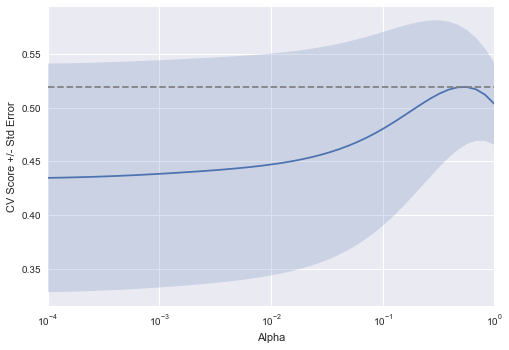

In [26]:
#observing which alpha to select in scoring
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


coeffs=pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(coeffs)

In [27]:
#predicting again without the previously removed features.
rf.predict(X)[0:5]

array([ 467005.94214417,  658033.72082607,   53297.850325  ,
         26407.549354  ,   36010.98979999])

In [28]:
#and the actual data.
all_data.Total_Costs.head(5)

Cif  ye
277  13    519297.676200
     14    770372.973000
     15     63046.854000
312  13     21292.546058
361  16     39805.490000
Name: Total_Costs, dtype: float64

In [29]:
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar

0.97490309681627529

In [30]:
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     41.90
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:30:07   Log-Likelihood:                -20562.
No. Observations:                1678   AIC:                         4.149e+04
Df Residuals:                    1493   BIC:                         4.250e+04
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Num_Staff                                        1364.6097    437.267      3.121      0.002     506.887    2222.332
Num_Subs                                         5737.0425    613.963      9.344      0.000    4532.721    6941.364
Num_Materials                                    8324.0519   1098.330      7.579      0.000    6169.618    1.05e+04
Num_Software                                    -1348.2841   2292.863     -0.588      0.557   -5845.859    3149.291
Staff_pct                                         993.8147     63.742     15.591      0.000     868.782    1118.847
CIF_Turnover                                        0.0007   8.24e-05      8.199      0.000       0.001       0.001
Staff_Payroll                                       0.1922      0.013     14.742      0.000       0.167       0.218
Sub_Payroll                                         0.2620      0.022     11.903      0.000       0.219       0.305
Material_Payroll                                    0.0214      0.002      8.844      0.000       0.017       0.026
Software_Payroll                                    1.1676      0.084     13.861      0.000       1.002       1.333
Month_August                                     1.013e+04   7827.118      1.294      0.196   -5221.663    2.55e+04
Month_December                                   1.196e+04   6231.303      1.919      0.055    -265.090    2.42e+04
Month_February                                   6352.1662   8960.906      0.709      0.479   -1.12e+04    2.39e+04
Month_January                                   -3496.8583   8792.504     -0.398      0.691   -2.07e+04    1.38e+04
Month_July                                      -5293.7002   9449.897     -0.560      0.575   -2.38e+04    1.32e+04
Month_June                                        935.1424   7219.001      0.130      0.897   -1.32e+04    1.51e+04
Month_March                                      1585.9145   5953.782      0.266      0.790   -1.01e+04    1.33e+04
Month_May                                        1.256e+04   8398.185      1.496      0.135   -3912.663     2.9e+04
Month_November                                   6215.4173   9312.280      0.667      0.505   -1.21e+04    2.45e+04
Month_October                                   -9854.6248   8869.365     -1.111      0.267   -2.73e+04    7543.114
Month_September                                 -1991.8844   7259.777     -0.274      0.784   -1.62e+04    1.22e+04
PostCode_AL                                     -3.485e+04   2.89e+04     -1.205      0.229   -9.16e+04    2.19e+04
PostCode_B                                      -3.104e+04   1.92e+04     -1.614      0.107   -6.88e+04    6694.130
PostCode_BA                                     -5.016e+04   1.92e+

In [31]:
#Removing all the highest P values. 

X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
X = X.drop(['CIF_Employees', 'Received', 'Completed', 'Phase_Phase 02', 'Phase_Phase 03', 'Phase_Phase 04', 'Phase_Phase 05'], axis=1)
X = X.drop(['Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September'], axis=1)
X = X[X.columns.drop(list(X.filter(regex='Industry')))]
X = X[X.columns.drop(list(X.filter(regex='PostCode')))]
X = X.drop(['Num_Materials', 'Num_Software'], axis=1)

y = all_data.Total_Costs
# This creates a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf
rf.fit(X, y)

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     832.8
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:30:08   Log-Likelihood:                -20743.
No. Observations:                1678   AIC:                         4.150e+04
Df Residuals:                    1670   BIC:                         4.155e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Num_Staff          930.1442    398.344      2.335      0.020     148.838    1711.450
Num_Subs          6108.5495    583.201     10.474      0.000    4964.668    7252.431
Staff_pct          680.9364     43.774     15.556      0.000     595.079     766.794
CIF_Turnover         0.0007   7.99e-05      8.407      0.000       0.001       0.001
Staff_Payroll        0.1911      0.012     16.059      0.000       0.168       0.214
Sub_Payroll          0.2059      0.021      9.870      0.000       0.165       0.247
Material_Payroll     0.0245      0.002     10.265      0.000       0.020       0.029
Software_Payroll     1.1969      0.066     18.020      0.000       1.067       1.327
==============================================================================
Omnibus:                     1045.675   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40715.816
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                      26.682   Cond. No.                     7.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Having removed the highest P value features which are not statistically significant to the total costs, 
# now I will try the linear regression model again to test its performance.
lm = LinearRegression()
lm
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#The score of of the linear regression model on the total costs. 
lm.score(X, all_data.Total_Costs)

0.7172296215097731

In [34]:
# The CV score is a bit higher but let's see how the random forest performs...
cv_scores3 = cross_val_score(lm, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(lm, X, y, cv=10)
print(np.mean(cv_scores10))

0.575913113692
0.554917697736


In [35]:
# The random forest regressor performs better using the sklearn score function. 
#Next is to split the train, test sets with the preferred model.

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X, y)
cv_scores3 = cross_val_score(rf, X, y, cv=3)

print(np.mean(cv_scores3))

cv_scores10 = cross_val_score(rf, X, y, cv=10)
print(np.mean(cv_scores10))

0.702408771184
0.677772728029


In [36]:
# data split and scored with the test sets. The R-squared value is good but the MSE is huge.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.8221782571585523
MSE: 2417623375.6335483


In [37]:
# first 10 values of the y_test
y_test.reset_index(drop=True, inplace=True)
y_test.head(10)

0     25711.766000
1     72009.507921
2    255748.948350
3     59359.975000
4     80595.100000
5     72840.658000
6    274640.971600
7     63750.716000
8     10538.743500
9     86285.340000
Name: Total_Costs, dtype: float64

In [38]:
# first 10 values of the X test predictions
rf.predict(X_test)[0:9]

array([  25821.239485  ,   69968.06534826,  195285.81733543,
         68453.64775773,  107092.38826467,   56127.00010478,
        284807.606935  ,   61677.12406759,   13448.45863346])

In [39]:
# Looking at the difference between the first 10 test and prediction sets.
y_test.subtract(rf.predict(X_test)).head(10)

0     -109.473485
1     2041.442572
2    60463.131014
3    -9093.672758
4   -26497.288265
5    16713.657895
6   -10166.635335
7     2073.591932
8    -2909.715133
9    27335.983200
dtype: float64

#The data is not linear, not normal, doesn't have a standard deviation. The data cannot use a linear model.

    Linearity. The dependent variable YY is a linear combination of the regression coefficients and the independent variables XX. This can be verified with a scatterplot of each XX vs. YY and plotting correlations among XX. Nonlinearity can sometimes be resolved by transforming one or more independent variables, the dependent variable, or both. In other cases, a generalized linear model or a nonlinear model may be warranted.
    Constant standard deviation. The SD of the dependent variable YY should be constant for different values of X. We can check this by plotting each XX against YY and verifying that there is no "funnel" shape showing data points fanning out as XX increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), robust standard errors, or variance stabilizing transformations.
    Normal distribution for errors. The ϵϵ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
    ϵi∼N(0,σ2)
    ϵi∼N(0,σ2)
    Sometimes the distributions of responses YY may not be normally distributed at any given value of XX. e.g. skewed positively or negatively.
    Independent errors. The observations are assumed to be obtained independently.
        e.g. Observations across time may be correlated 


# Classification

The regression model yielded fair estimations but may be impractical to use. A classification system might be a better way of estimating 

In [40]:
#First I will bin the total costs using a qcut into equal frequency buckets.

all_data['cost_bins']=pd.qcut(all_data['Total_Costs'], 5, labels=False)

In [41]:
# I have also obtained the edges of each bin 
# and used the rounding 'precision' function in order to see roughly what the dividing lines are.

bin_key=all_data.reset_index()
bin_key['Total_Costs']
bin_key=pd.qcut(bin_key['Total_Costs'], 5, precision=-3).drop_duplicates().sort_values()
bin_key.reset_index(drop=True, inplace=True)
bin_key

0       (-1000.0, 15000.0]
1       (15000.0, 33000.0]
2       (33000.0, 56000.0]
3      (56000.0, 100000.0]
4    (100000.0, 1310000.0]
Name: Total_Costs, dtype: category
Categories (5, interval[float64]): [(-1000.0, 15000.0] < (15000.0, 33000.0] < (33000.0, 56000.0] < (56000.0, 100000.0] < (100000.0, 1310000.0]]

In [42]:
#bins shown to be equal parts.
all_data.cost_bins.value_counts()

4    336
2    336
0    336
3    335
1    335
Name: cost_bins, dtype: int64

In [43]:
#visual check on the mid point
all_data[all_data['cost_bins'] == 2]

Received  Completed   Total_Costs   Staff_Costs  Subcontractor_Costs  \
Cif  ye                                                                         
361  16     155.0      932.0  39805.490000  35333.400000             0.000000   
403  13     257.0        0.0  42309.500000  42309.500000             0.000000   
     14     257.0      141.0  42309.500000  42309.500000             0.000000   
415  15     379.0      893.0  53406.449503  41819.334670         11531.114833   
421  12     175.0       31.0  35119.132000  33013.232000             0.000000   
451  13     136.0      115.0  33055.162800  28855.162800             0.000000   
     15     136.0      829.0  36179.997500  35635.717500             0.000000   
526  13     274.0      306.0  45953.565500  43319.515500           407.550000   
531  15     281.0      599.0  52930.875000  52008.775000             0.000000   
     16     281.0     1005.0  35973.196800  34474.106800             0.000000   
538  14     292.0      520.0  45950.374350  45950.374350             0.000000   
591  15     171.0      640.0  49408.563000  31360.923000         17355.000000   
597  13     358.0      274.0  36775.256000  12862.858500         23912.397500   
601  12     361.0      184.0  41338.905500  39239.529000          2099.376500   
609  13     363.0      238.0  48530.035889  47167.298500             0.000000   
617  15     325.0     1005.0  47318.220400  46818.220400             0.000000   
622  15     389.0      283.0  40264.119000  39189.219000             0.000000   
625  15     392.0      255.0  35847.442000  30985.200000          1747.512000   
627  14     557.0      459.0  50716.485000   2976.000000         47740.485000   
645  13     428.0      235.0  52804.426000  25266.806000             0.000000   
     14     428.0      491.0  41003.310000  22606.610000             0.000000   
658  16     527.0     1192.0  53836.141800  33426.400000          3038.705800   
662  16     741.0      966.0  45439.137000  39589.137000          5850.000000   
665  13     452.0      262.0  51894.358500  51894.358500             0.000000   
     14     452.0      262.0  53730.262000  53730.262000             0.000000   
669  14     453.0      346.0  34915.556000   8465.556000             0.000000   
672  15     458.0      643.0  55525.670000  52862.270000             0.000000   
678  16     439.0     1029.0  53159.747000  29228.227000             0.000000   
681  14     651.0      274.0  48494.804900  20471.988000         20428.916900   
     16     473.0     1065.0  45766.932234  38346.448000          6974.384234   
...           ...        ...           ...           ...                  ...   
3361 14    1030.0      851.0  49640.448000      0.000000         49640.448000   
3370 16    1035.0     1035.0  48091.441010  48091.441010             0.000000   
3372 15    1036.0      935.0  42137.928500  29671.360500          1529.528000   
3413 14     871.0      914.0  35111.280000  33702.000000             0.000000   
3424 16     932.0      933.0  38467.010481  37075.403750             0.000000   
3449 15    1085.0      871.0  53608.019000  41060.179000             0.000000   
3463 16    1058.0      991.0  33912.755244  33912.755244             0.000000   
3479 15    1063.0      899.0  39118.865700  24273.009000             0.000000   
3484 16    1064.0      935.0  37122.160000      0.000000             0.000000   
3505 14    1072.0      884.0  39217.275000  33755.650000          5461.625000   
3509 15    1075.0     1003.0  45688.555835  45688.555835             0.000000   
3534 15    1090.0      991.0  48822.926000  41849.246000             0.000000   
     16    1090.0      991.0  44385.994500  37490.474500             0.000000   
3546 15    1096.0      946.0  39726.827500  39726.827500             0.000000   
3551 16    1097.0      968.0  34271.906811  33793.706811             0.000000   
3578 15    1105.0      907.0  46235.714000  45454.514000             0.000000   
     16    1105.0     1031.0  48603.1801

In [44]:
#Retrieving the data as has been done before in the regression models. 

X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
X = X.drop(['CIF_Employees', 'Received', 'Completed', 'Phase_Phase 02', 'Phase_Phase 03', 'Phase_Phase 04', 'Phase_Phase 05'], axis=1)
X = X.drop(['Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September'], axis=1)
X = X[X.columns.drop(list(X.filter(regex='Industry')))]
X = X[X.columns.drop(list(X.filter(regex='PostCode')))]
X = X.drop(['Num_Software', 'cost_bins'], axis=1)
y=all_data['cost_bins'].astype(float)
X

Num_Staff  Num_Subs  Num_Materials   Staff_pct  CIF_Turnover  \
Cif  ye                                                                 
277  13       15.0       6.0            1.0   45.000000           0.0   
     14       17.0       8.0            5.0   25.000000           0.0   
     15        0.0       1.0            0.0    0.000000           0.0   
312  13        7.0       0.0            0.0   25.000000           0.0   
361  16        6.0       0.0            2.0   30.000000     2760000.0   
403  13        6.0       0.0            0.0   20.750000           0.0   
     14        6.0       0.0            0.0   20.750000           0.0   
     15        7.0       1.0            1.0   24.000000           0.0   
     16        3.0       2.0            1.0   20.000000           0.0   
415  15       10.0       3.0            1.0   20.870487           0.0   
421  12        2.0       0.0            2.0   80.000000           0.0   
     14        2.0       5.0            1.0  100.000000           0.0   
     15        2.0       4.0            0.0  100.000000           0.0   
427  13        6.0       0.0            1.0   18.000000           0.0   
     14        5.0       0.0            2.0   20.000000           0.0   
451  12        4.0       0.0            0.0   25.500000           0.0   
     13        5.0       0.0            2.0   22.000000           0.0   
     15        6.0       0.0            1.0   12.500000           0.0   
463  12        5.0       0.0            0.0    0.880000           0.0   
     14        6.0       5.0            2.0   17.000000           0.0   
495  15        4.0       0.0            1.0   15.000000           0.0   
496  13       12.0       0.0            2.0   35.000000           0.0   
     14       12.0       0.0            2.0   35.000000           0.0   
     15        9.0       2.0            2.0   40.000000           0.0   
     16       16.0       0.0            2.0   35.000000           0.0   
501  13        5.0       0.0            1.0   10.000000           0.0   
     14        8.0       0.0            1.0   10.000000           0.0   
502  12        5.0       1.0            0.0   40.000000           0.0   
504  14        8.0       0.0            0.0   20.000000           0.0   
505  13       10.0       0.0            4.0   25.000000           0.0   
...            ...       ...            ...         ...           ...   
3850 15        2.0       0.0            1.0    4.824526     9000000.0   
     16        2.0       0.0            1.0    7.779624     9000000.0   
3851 16        3.0       0.0            1.0   23.020000     5000000.0   
3855 15        5.0       0.0            0.0   50.000000      400000.0   
     16        5.0       0.0            0.0   33.333333      400000.0   
3856 15        8.0       0.0            2.0   10.000000     3500000.0   
3863 15       15.0       0.0            0.0    2.105079    25000000.0   
     16       18.0       0.0            1.0    3.214499    25000000.0   
3866 15        4.0       0.0            0.0   17.500000     3000000.0   
     16        4.0       0.0            0.0   17.500000     3000000.0   
3883 15        4.0       0.0            1.0   32.500000     1600000.0   
     16        5.0       0.0            1.0   40.000000     1600000.0   
3907 15        0.0       2.0            0.0    0.000000    90000000.0   
     16        0.0       2.0            0.0    0.000000    90000000.0   
3929 17        2.0       0.0            1.0   22.500000     4500000.0   
3987 16        0.0       2.0            0.0    0.000000      250000.0   
4032 17        1.0       1.0            0.0   20.000000       60000.0   
4082 15        9.0       0.0            2.0   10.000000      600000.0   
4098 16       28.0       0.0            4.0   30.000000     9000000.0   
     16       28.0       0.0            4.0   30.000000     9000000.0   
4132 16        2.0       0.0            1.0   28.720731     1000000.0   
     17        2.0       0.0            1.0   31.426060     1000000

In [45]:
# Next I have applied the Random Forest Classifier. 
# Looking at the r2 value, it does not perform as effectively as the random forest regressor.
#The MSE however is much smaller and much more manageable. 
from sklearn.ensemble import RandomForestClassifier

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=20, random_state=0)

# Fit it to the training data
rfc.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = rfc.predict(X_test)
r2 = rfc.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.7261904761904762
MSE: 0.4583333333333333


In [46]:
#Next the cross validation score also shows a dip in performance using a random forest classifier.
cv_scores3 = cross_val_score(rfc, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(rfc, X, y, cv=10)
print(np.mean(cv_scores10))

0.61147380099
0.630607333843


In [47]:
# Below we see where the classifier has estimated the data. 
#It performs better on the outer bins and much worse on the inner bins.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56 10  0  0  0]
 [ 3 52 12  1  0]
 [ 2 14 42 13  0]
 [ 4  1 10 40 12]
 [ 1  0  1  8 54]]
             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85        66
        1.0       0.68      0.76      0.72        68
        2.0       0.65      0.59      0.62        71
        3.0       0.65      0.60      0.62        67
        4.0       0.82      0.84      0.83        64

avg / total       0.72      0.73      0.72       336



In [48]:
#Testing another classifier, the SVR.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVR to the dataset
from sklearn.svm import SVR


parameters = {
    "kernel": ["rbf"],
    "C": [1,10,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    }

grid = GridSearchCV(SVR(), parameters, cv=5, verbose=2)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] .

[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=rbf ..................................
[CV] .

[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   35.1s finished


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [52]:
# Predicting the new results. The results go over 5 and under 0, which shouldn't be possible.
y_pred = grid.predict(X_test)
y_pred

array([  3.21433405e+00,   3.40777161e+00,   7.38640444e-01,
         1.81336153e+00,   1.09148961e+00,   4.78503881e-01,
         3.67840335e+00,   3.42185290e+00,   3.72830796e+00,
         1.74617111e+00,   4.21748639e+00,   1.30872277e+00,
         4.82936346e-01,   1.55664062e+00,   2.51295868e+00,
         1.97879907e+00,   7.78610209e-02,   3.95219104e-01,
         1.53788159e+00,   1.40102207e+00,   3.69532393e+00,
         5.67774325e-01,   2.53814947e+00,   8.85094394e-01,
         2.78484692e+00,   4.23441181e+00,   4.74813147e-01,
         1.42525902e+00,   6.73405821e-01,   2.21506133e+00,
         4.52267861e+00,   4.00690088e+00,   3.72630509e+00,
         3.63786189e+00,   3.93138431e-01,   2.84738168e+00,
         3.14558081e+00,   2.42580496e+00,   1.90653309e+00,
         4.42103019e-01,   2.58261521e-01,   2.13988068e+00,
         4.50206752e+00,   4.03574195e+00,   2.59560672e+00,
         3.26391238e+00,   3.13303437e+00,   3.31778406e+00,
         3.65546303e+00,

In [53]:
#The classifier report does not seem to work 
print(classification_report(y_test, y_pred))

ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous'}